In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/Train.csv', index_col=0)
df.head()

df_test = pd.read_csv('./data/Test.csv', index_col=0)
df_test

,Datetime
ID,
18288,26-09-2014 00:00
18289,26-09-2014 01:00
18290,26-09-2014 02:00
18291,26-09-2014 03:00
18292,26-09-2014 04:00
...,...
23395,26-04-2015 19:00
23396,26-04-2015 20:00
23397,26-04-2015 21:00


taking small amount of data just for checking if it is seasonal or not. Conclusion is that it is seasonal

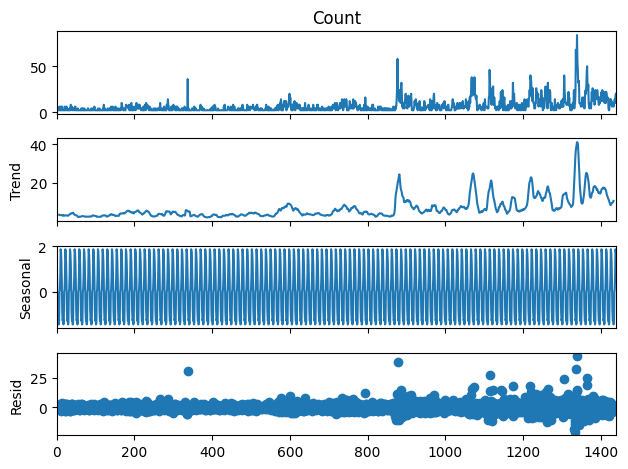

In [3]:
series = df['Count'].head(1440)
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
plt.show()

Now with whole data checking if it is increasing or stationary with time

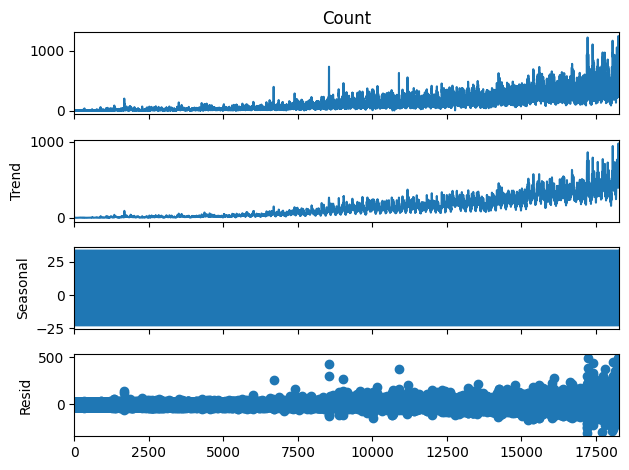

In [4]:
series = df['Count']
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
plt.show()

series_test = df_test['Datetime']

checking with multiplicative method:

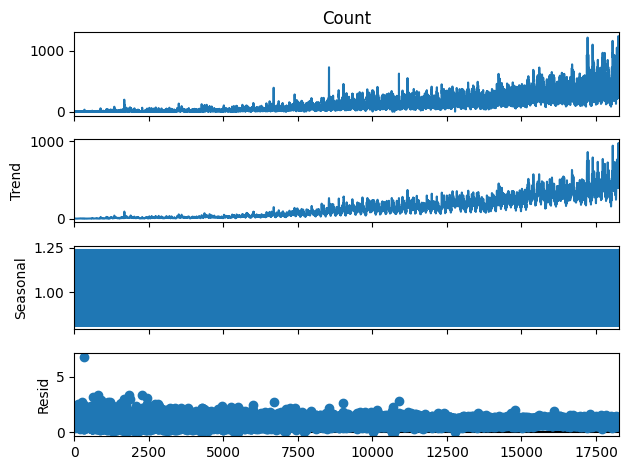

In [5]:
result =  seasonal_decompose(series, model='multiplicative', period=12)
result.plot()
plt.show()

In [6]:
y_train = df['Count'].iloc[:-100]
y_test = df['Count'].iloc[-100:]

# 1. Holt Linear trend

In [7]:
from statsmodels.tsa.api import Holt
from ipywidgets import widgets
from sklearn.metrics import root_mean_squared_error

alpha = 0.8
beta = 0.02


holt = Holt(y_train)
def holt_linear(alpha,beta):
    fitting = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
    fcast = fitting.forecast(len(y_test))
    y_test.plot(color='pink', label='Test')
    fcast.plot(color='purple', label='forcast')
    rmse = root_mean_squared_error(y_test, fcast)
    plt.title(f'RMSE = {rmse:.2f}, alpha={alpha:.2f}, beta={beta:.2f}')
    plt.legend(loc='best')
    plt.show()

widgets.interact(holt_linear, alpha=(0.01,1,0.01), beta=(0.01,1,0.01))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_linear(alpha, beta)>

# 2. Holt Winters

In [8]:
from statsmodels.tsa.api import ExponentialSmoothing

alpha = 0.8
beta = 0.02
gamma = 0.02

expo = True

def holt_w(alpha,beta,gamma,seasonality,periods):
    holt_winter = ExponentialSmoothing(y_train, seasonal_periods=periods, trend='add', seasonal=seasonality)
    fitting = holt_winter.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
    forecast = fitting.forecast(len(y_test))
    forecast.plot(color='purple', label='Forecast')
    y_test.plot(color='pink', label='Test')
    rmse = root_mean_squared_error(y_test,forecast)
    plt.title(f'RMSE:{rmse:.2f} Alpha:{alpha:.2f} Beta:{beta} Gamma:{gamma:.2f}')
    plt.legend(loc='best')
    plt.show()

widgets.interact(holt_w, alpha=(0.01,1,0.01), beta=(0.01,1,0.01), gamma=(0.01,1,0.01), periods=(1,24,1), seasonality=['mul','add'])


interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_w(alpha, beta, gamma, seasonality, periods)>

# 3. SARIMA

In [9]:
from statsmodels.tsa.arima.model import ARIMA

def sarima(p,d,q,P,D,Q,S):
    model = ARIMA(y_train, order=(p,d,q), seasonal_order=(P,D,Q,S))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
    y_test.plot(color='pink', label='Test')
    predictions.plot(color='purple', label='Forecast')
    rmse = root_mean_squared_error(y_test, predictions)
    plt.title(f"RMSE: {rmse}")
    plt.legend(loc='best')
    plt.show()
widgets.interact(sarima, p=(0,5,1), d=(0,5,1), q=(0,5,1), P=(0,5,1), D=(0,5,1), Q=(0,5,1), S=(1,24,1))

interactive(children=(IntSlider(value=2, description='p', max=5), IntSlider(value=2, description='d', max=5), …

<function __main__.sarima(p, d, q, P, D, Q, S)>